In [1]:
%matplotlib inline 

In [2]:
import matplotlib.pyplot as plt
import rasterio.plot
import rasterio as rio 
import pathlib as path
import pandas 
import geopandas as gpd

# Open source modeling of rock aggregate resources in Finland

/Users/christophbrendel/RockProject/data/realsuomi/bufflayers/Water


## Preparation of the Data

### 1. Script for unzipping 

In [6]:
# Script for unzipping the folders

def folderunzip(filename):
    import zipfile
    
    zip_ref = zipfile.ZipFile(filename, 'r')
    zip_ref.extractall(".")
    zip_ref.close()

if __name__ == "__folderunzip__":
    folderunzip()
    
# execution of the function below
folderunzip(filename = "waterfortin.zip")

In [6]:
#Script for unzipping the datasets
import zipfile,fnmatch,os
def unzip():
    rootPath = r"./data/realsuomi/Varsinais-"

    pattern = '*.zip'
    
    for root, dirs, files in os.walk(rootPath):

        for filename in fnmatch.filter(files, pattern):

            print(os.path.join(root, filename))

            zipfile.ZipFile(os.path.join(root, filename)).extractall(os.path.join(root, filename.split(".")[0]))
            
if __name__ == "__unzip__":
    unzip()
# execution of the function below

unzip()            

./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3423R.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3424L.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3442R.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3442L.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3424R.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K34/K3423L.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K32/K3243L.shp.zip
./data/realsuomi/Varsinais-Suomi-20190407T221928Z-001/Varsinais-Suomi/mml/maastotietokanta/2018/K3/K32/K3244R.shp.zi

In [26]:
import os, shutil


def deletefiles(directory):
    folder = directory
    for the_file in os.listdir(folder):
        file_path = os.path.join(folder, the_file)
        try:
            if os.path.isfile(file_path):
                os.unlink(file_path)
            #elif os.path.isdir(file_path): shutil.rmtree(file_path)
        except Exception as e:
            print(e)

if __name__ == "__deletefiles__":
    deletefiles()
    
#deletefiles(directory = "data/bufflayers/Water")        

### 2. Sorting of the data

In [8]:
# Sorting script for the NLS Data 

import os
import shutil

fullpath = os.path.join

# bufflayers_directory = "./data/bufflayers"

buildings = "./data/realsuomi/bufflayers/Buildings"
pipelines = "./data/realsuomi/bufflayers/Pipelines"
protected = "./data/realsuomi/bufflayers/Protected"
special = "./data/realsuomi/bufflayers/Special"
traffic = "./data/realsuomi/bufflayers/Traffic"
water = "./data/realsuomi/bufflayers/Water"
warehouse = "./data/realsuomi/bufflayers/Warehouse"
rawdata_directory = "./data/realsuomi/Varsinais/Varsinais-Suomi/mml/maastotietokanta/2018"
useless_files = "./data/useless"

# function that sorts the needed layers for buffering  
# it's sorting the files based on the description code 

def main():
    for dirname, dirnames, filenames in os.walk(rawdata_directory):
        for filename in filenames:
            source = fullpath(dirname, filename)
            if filename.startswith("l_"):
                shutil.move(source, fullpath(traffic, filename))
            elif filename.startswith("j_"):
                shutil.move(source, fullpath(pipelines, filename))
            elif filename.startswith("r_"):
                shutil.move(source, fullpath(buildings, filename))
            elif filename.startswith("e_"):
                shutil.move(source, fullpath(special, filename))
            elif filename.startswith("m_"):
                shutil.move(source, fullpath(water, filename))
            elif filename.startswith("n_"):
                shutil.move(source, fullpath(warehouse, filename))
            elif filename.startswith("s_"):
                shutil.move(source, fullpath(protected, filename))          
                
            
if __name__ == "__main__":
    main()
# execution of the function below
main()

In [ ]:
# Merging the shapefiles
def merge():
    folder = path.Path("./data/realsuomi/bufflayers/Water")
    destination = path.Path("./data/realsuomi/bufflayers/Merged/Water")
    shapefiles = folder.glob("*v.shp")
    gdf = pandas.concat([
        gpd.read_file(shp)
        for shp in shapefiles
    ]).pipe(gpd.GeoDataFrame)
    gdf.to_file(destination / 'river.shp')
    
#if __name__ == "__merge__":
 #   merge()
    
merge()

In [18]:
cd ..

/Users/christophbrendel/RockProject


In [12]:
#Script for merging the tiles
import glob
import os

file_list = glob.glob("*.tif")

files_string = " ".join(file_list)

command = "gdal_merge.py -o output.tif -of gtiff " + files_string

os.system(command)

0

In [13]:
import os

os.system("ogr2ogr -where LUOKKA=36312 rivers.shp river.shp")

0

In [7]:
os.system("for f in *v.shp; do ogr2ogr -update -append river.shp $f -f "ESRI Shapefile"; done;")

SyntaxError: invalid syntax (<ipython-input-7-6a6b9db391d2>, line 1)

In [8]:
polygon = gpd.read_file("./data/bufflayers/Water/m_L4222R_s.shp")

#polygon["geometry"] = polygon.geometry.buffer(0.0044)
#polygon.to_file("myshapefile.shp", "ESRI Shapefile ")
print(polygon.crs)

{'proj': 'utm', 'zone': 35, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True}


In [ ]:
def buffer(buffer_distance, file_location):
    polygon = gpd.read_file(file_location)
    polygon["geometry"] = polygon.geometry.buffer(buffer_distance)
    polygon.to_file("myshapefile.shp", "ESRI Shapefile ")
    
buffer(0.0044,"./data/bufflayers/Merged/special.shp", "./data/bufflayers/Merged")    

In [12]:
# Sources of the merged shapefiles

pipeline_source = "./data/bufflayers/Merged/pipelines.shp"
compiled_pipes = gpd.read_file(pipeline_source)

buildings_source = "./data/bufflayers/Merged/buildings.shp"
compiled_buildings = gpd.read_file(buildings_source)

traffic_source = "./data/bufflayers/Merged/traffic.shp"
compiled_traffic = gpd.read_file(traffic_source)


In [3]:
water_source = "./data/bufflayers/waterforbuff/water.shp"
compiled_water = gpd.read_file(water_source)

In [51]:
water_source = "./data/bufflayers/Merged/Protected.shp"
compiled_water = gpd.read_file(water_source)

In [ ]:
#compiled_pipes['geometry'] = compiled_pipes.geometry.buffer(5)
compiled_water['geometry'] = compiled_water.geometry.buffer(500)

In [10]:
#poly = df.geometry.unary_union
#points_clip = compiled_pipes[compiled_pipes.geometry.intersects(poly)]

#water_clip = compiled_water[compiled_water.geometry.intersects(poly)]

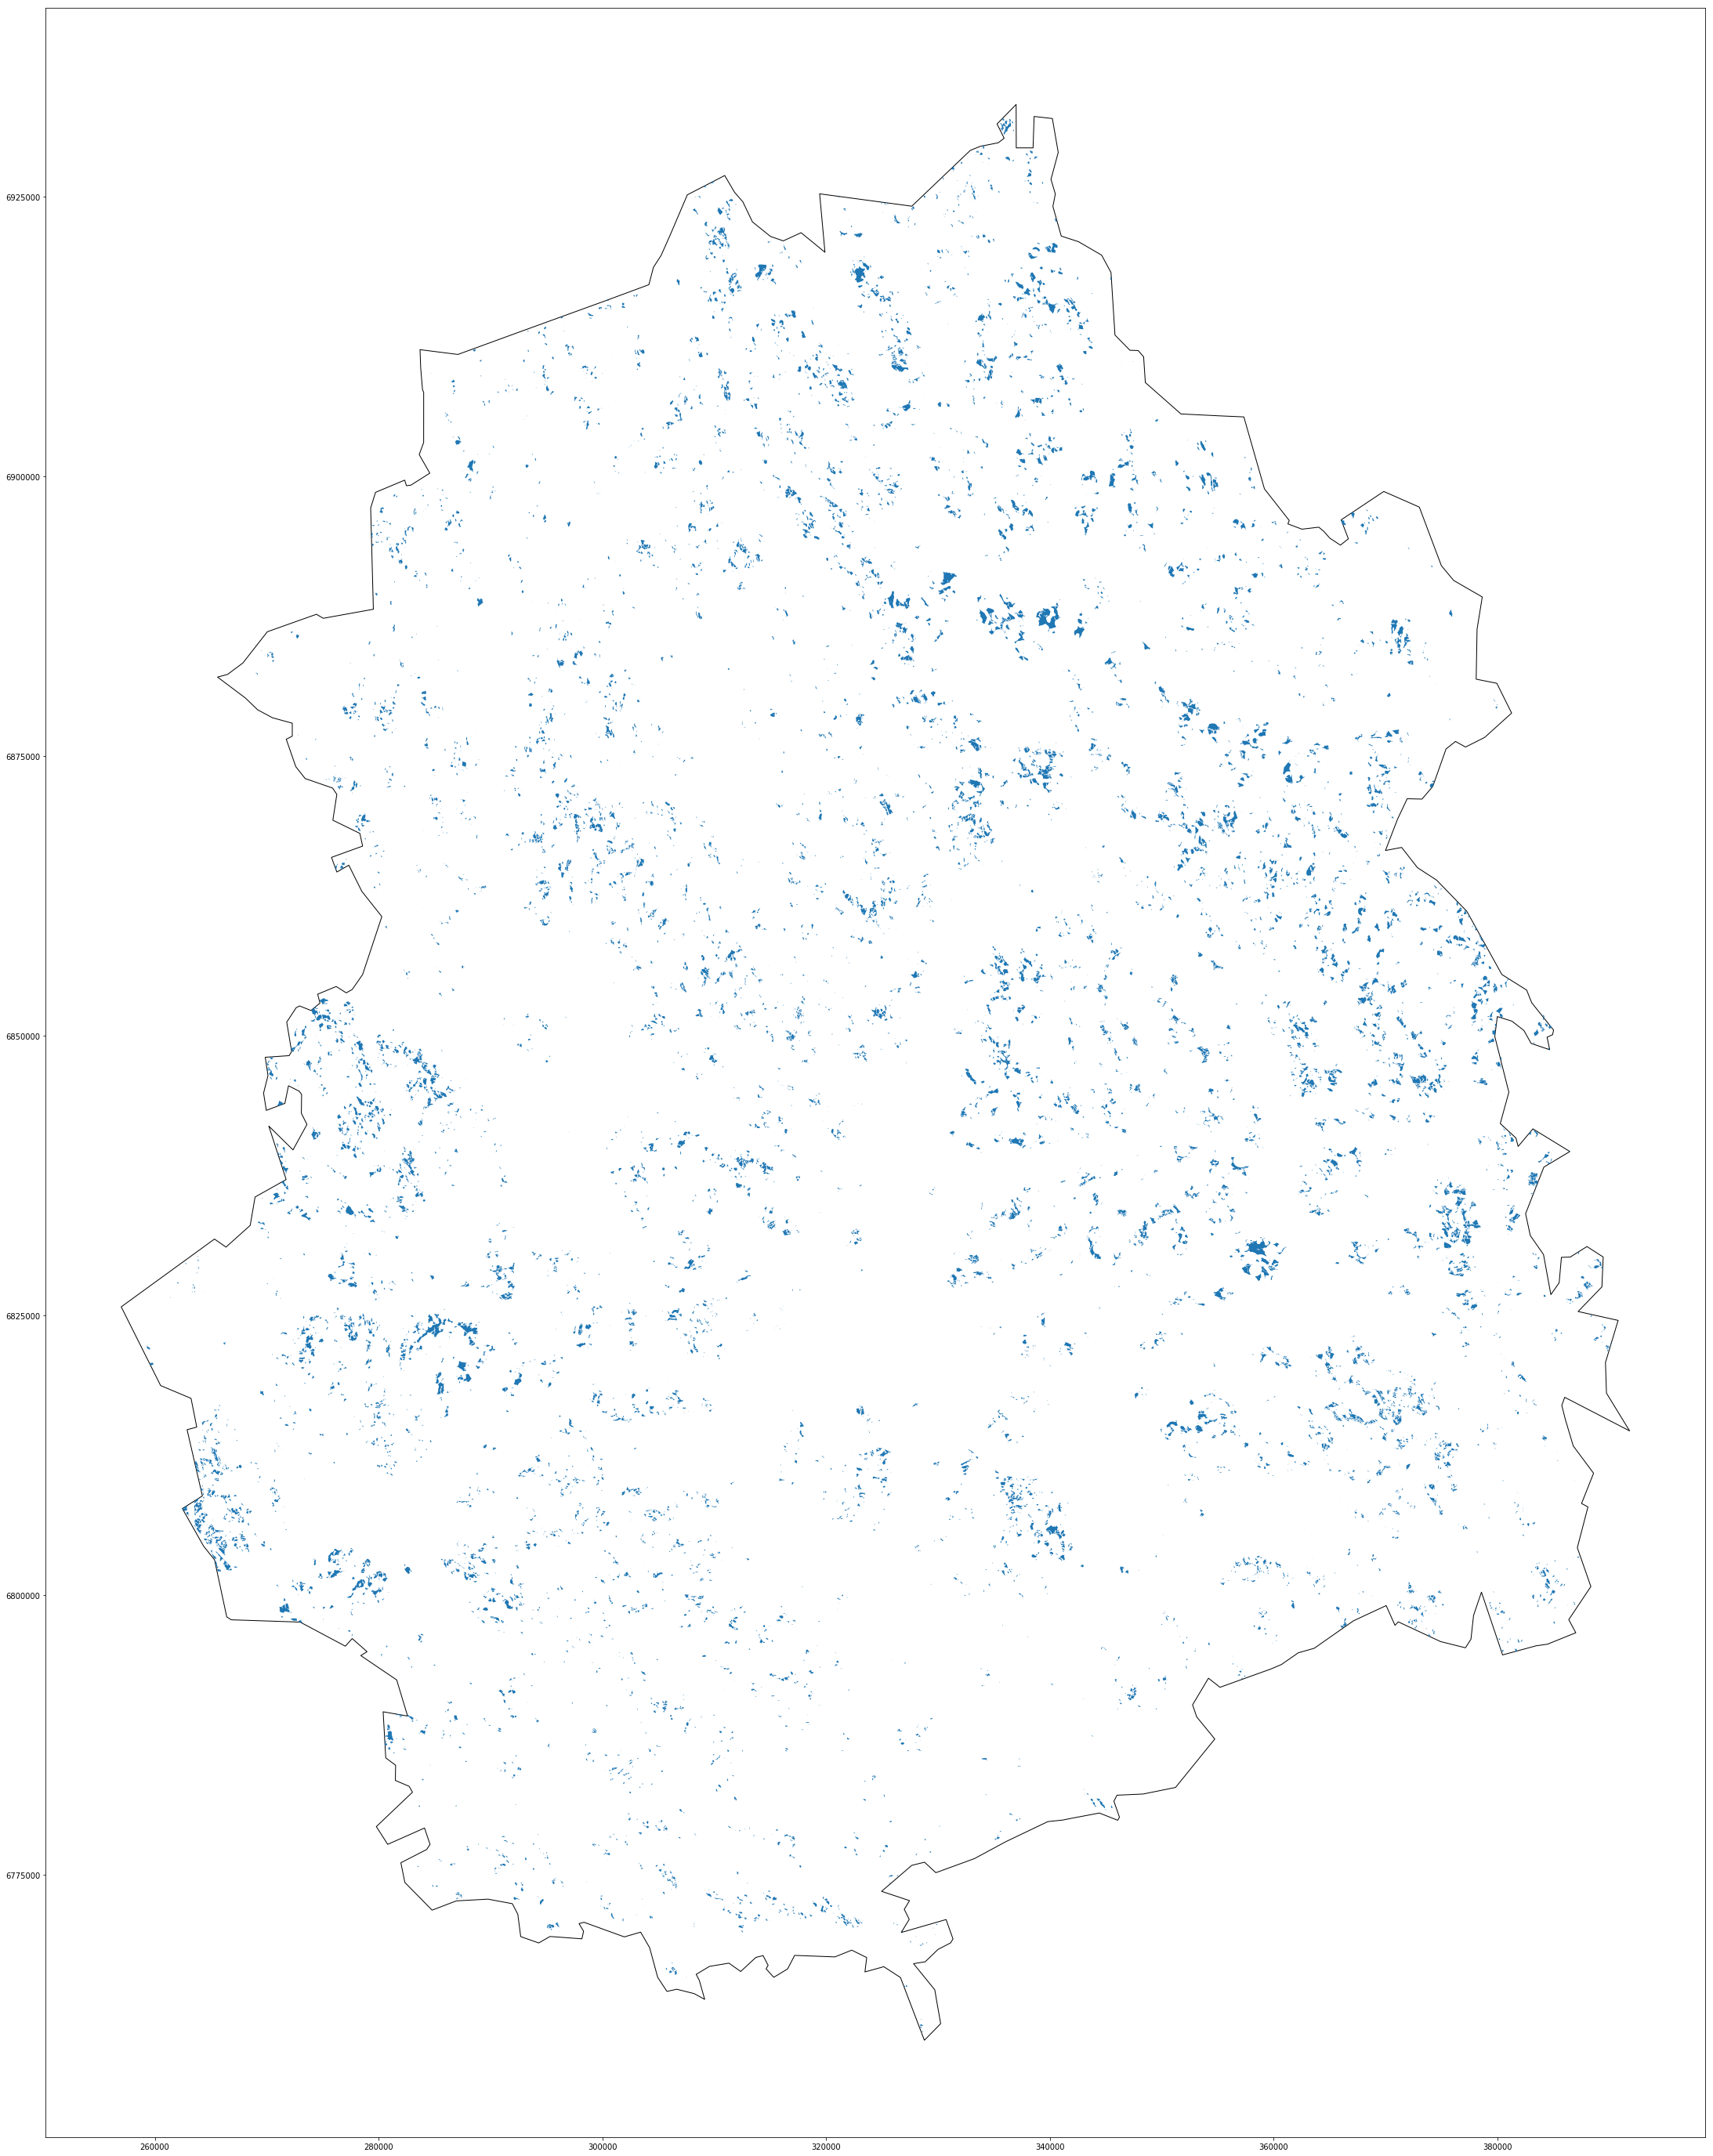

In [19]:
#plotting

mun = "./data/Muncipiality/Muncipiality.shp"
top = "./Pirkanmaa/Results/pirkanmaa_rock_aggregate.shp"
#elev = "./data/Elevation/M4212.tif"




#elevplot = rio.open(elev)
df = gpd.read_file(mun)
df2 = gpd.read_file(top)
plt.rcParams['figure.figsize'] = (8, 8)

fig, ax = plt.subplots(figsize=(50,50))

# rio.plot.show(elevplot, ax=ax)
df.plot(ax=ax,facecolor='none', edgecolor='black')
df2.plot(ax=ax)
#compiled_pipes.plot(ax=ax, edgecolor="orange")
#compiled_buildings.plot(ax=ax, edgecolor="red")
#compiled_traffic.plot(ax=ax, edgecolor="blue")
#compiled_water.plot(ax=ax, edgecolor="blue")

### 3.

<osgeo.ogr.DataSource; proxy of <Swig Object of type 'OGRDataSourceShadow *' at 0x11aa9b9f0> >


In [5]:
from osgeo import ogr

def create_filtered_shapefile(value, filter_field, in_shapefile, out_shapefile):
    input_layer = ogr.Open(in_shapefile).GetLayer()

    # Filter by our query
    query_str = '"{}" = "{}"'.format(filter_field, value)
    input_layer.SetAttributeFilter(query_str)

    # Copy Filtered Layer and Output File
    driver = ogr.GetDriverByName('ESRI Shapefile')
    out_ds = driver.CreateDataSource(out_shapefile)
    out_layer = out_ds.CopyLayer(input_layer, str(value))
    del input_layer, out_layer, out_ds
    return out_shapefile

if __name__ == "__create_filtered_shapefile__":
    create_filtered_shapefile()



In [20]:
cd RockProject/

/Users/christophbrendel/RockProject


In [ ]:
import glob
import os

file_list = glob.glob("*.tif")

files_string = " ".join(file_list)

command = "gdal_merge.py -o output.tif -of gtiff " + files_string

os.system(command)

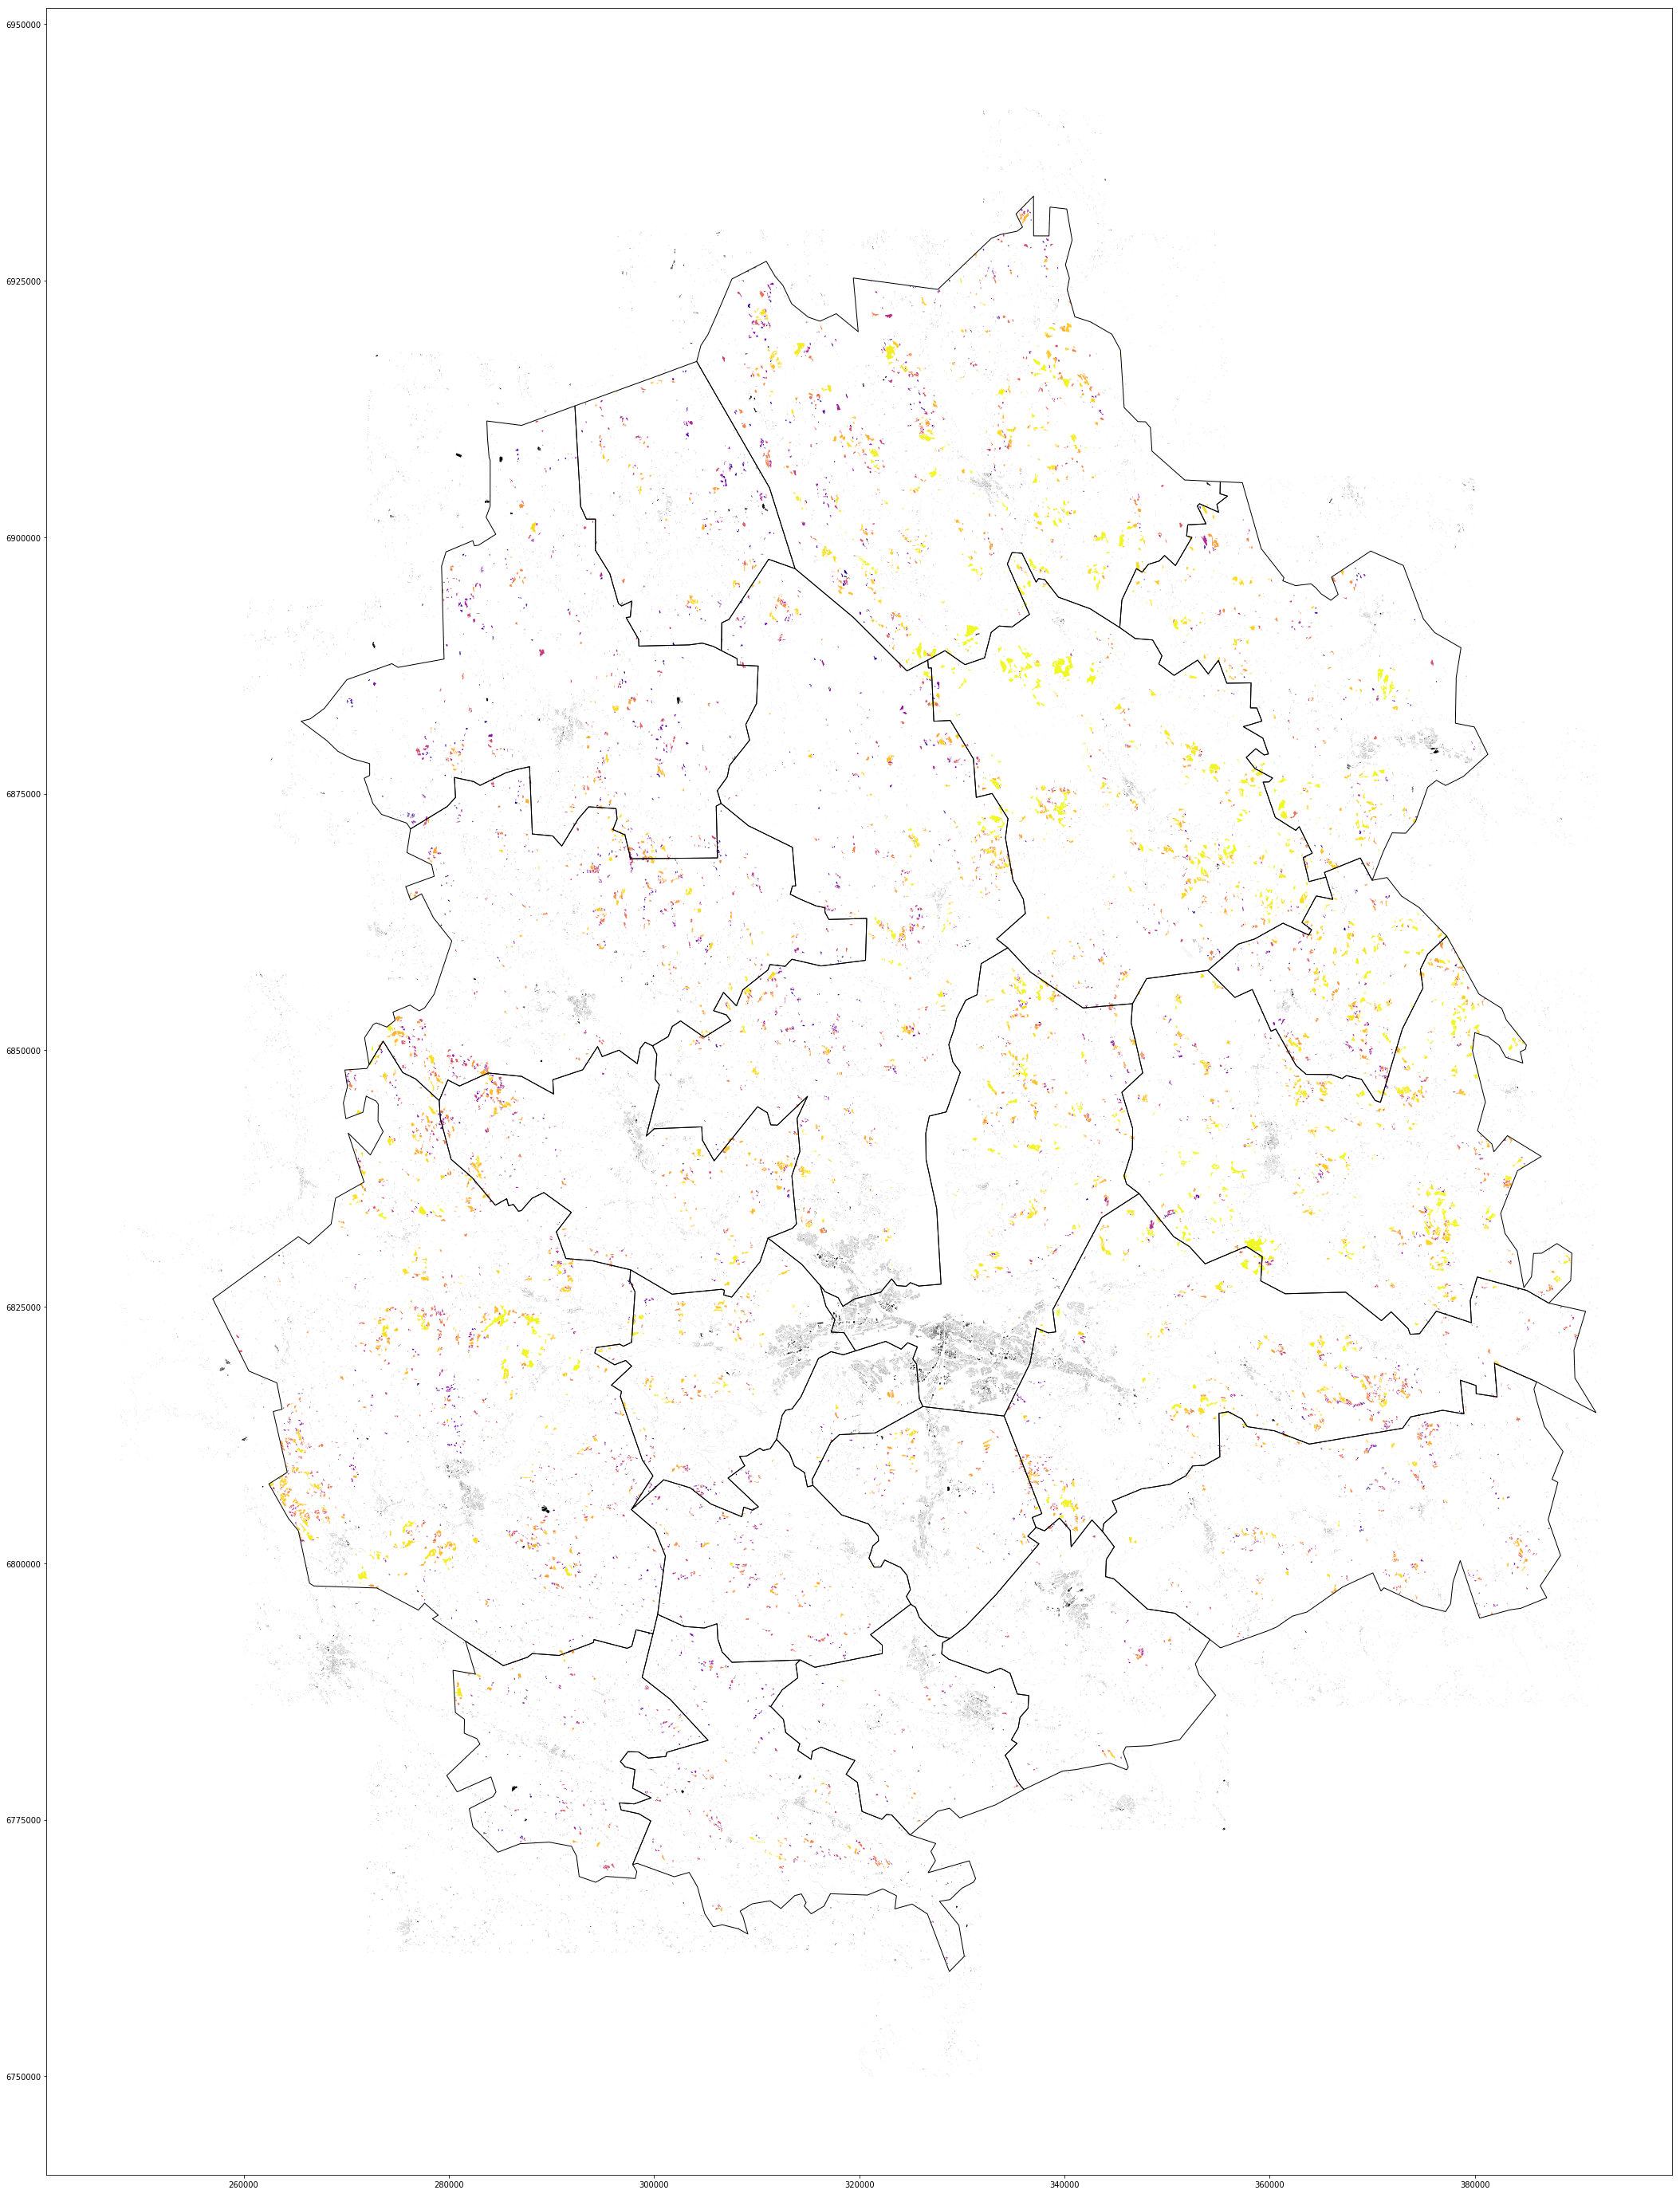

In [4]:
rock = "./data/rock_aggregate/pirkanmaa_rock_aggregate.shp"
munic = "./data/rock_aggregate/pirkanmaa_muncipalities.shp"
buildings = "./data/bufflayers/Merged/Buildings/buildings.shp"

df = gpd.read_file(rock)
df2 = gpd.read_file(munic)
df3 = gpd.read_file(buildings)





fig, ax = plt.subplots(figsize=(50,50))
plt.rcParams['figure.figsize'] = (8, 8)
df.sort_values("rock").plot(ax=ax,cmap="plasma")
df2.plot(ax=ax,facecolor='none', edgecolor='black')
df3.plot(ax=ax,facecolor="black")
#listings_low.sort_values("price").plot("price", ax=ax,cmap="Greens", markersize=40, legend=True)

In [19]:
import requests
import geopandas as gpd
import pandas as pd
import pandas_bokeh
pandas_bokeh.output_notebook()
import bokeh
from bokeh.plotting import save, figure
from bokeh.models import LinearColorMapper 
from bokeh.transform import transform
import numpy as np

Loading BokehJS ...

In [4]:
rock = "./data/rock_aggregate/pirkanmaa_rock_aggregate.shp"

In [10]:
df_rock = gpd.read_file(rock)
df_rock.head()
values = df_rock["rock"].tolist()

print(np.amin(df_rock["rock"]))

100070.0


In [6]:
colors = ['#440154', '#404387', '#29788E', '#22A784', '#79D151', '#FDE724']
mapper = LogColorMapper(
    palette=colors, low=np.amin(values), high=np.amax(values))

/anaconda3/envs/TEST/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [20]:
p = df_rock.plot_bokeh(simplify_shapes=5000, category="rock", show_colorbar=False, colormap="Magma", colormap_uselog=True)

# Output filepath
outfp = r"./data/test_map.html"
#output_file("test.html")
# Save the map
save(p, outfp)

/anaconda3/envs/TEST/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/anaconda3/envs/TEST/lib/python3.7/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/christophbrendel/RockProject/data/test_map.html'

In [ ]:
# GDAL command for extracting the attribute:
# ogr2ogr -where LUOKKA=36200 36200.shp water.shp